In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
music_data = pd.read_csv('data.csv')
print("Dataset has", music_data.shape)
music_data.head()

Dataset has (338, 15)


,Unnamed: 0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
0,0,126.59978,76.037460,-5.809633,13.457764,-4.247101,10.999980,2.685536,5.501438,2.771362,3.971310,2.555236,4.100902,3.023632,1
1,1,126.90965,62.227654,-4.346421,14.845157,-1.242509,12.564735,1.354928,7.010197,4.777449,3.333875,3.919385,2.228576,2.584348,1
2,2,113.69998,80.220400,-6.840761,18.043343,-0.897321,10.954094,2.716403,6.752585,3.236335,2.628345,3.434884,0.375390,2.274458,1
3,3,123.81981,72.963610,-7.225404,21.837970,4.926759,10.167419,1.782621,6.924591,2.859112,3.478521,2.593729,2.471611,2.616017,1
4,4,133.70938,61.544037,-5.711999,16.739765,-1.500485,11.202463,3.833682,8.845648,3.409268,6.049750,4.445247,3.725402,3.188183,1


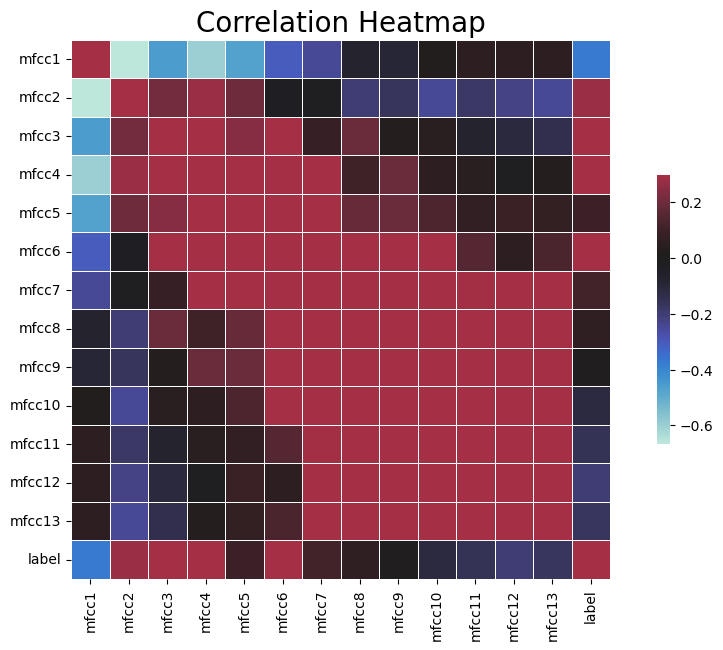

In [4]:
# Computing the  Correlation Matrix using only the features that have 'mean' in their name.
cols = [col for col in music_data.columns if 'mfcc' in col]
cols.append('label')
corr = music_data[cols].corr()

#the matplotlib figure
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Corr_Heatmap.png")

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_metrics(y_actual, y_pred, classes, model_name='model'):
    """
    Input: trained model history, model, test image generator, actual and predicted labels, class list
    Output: Plots loss vs epochs, accuracy vs epochs, confusion matrix
    """
    fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_pred)
    AUC = metrics.auc(fpr, tpr)*100
    Acc = accuracy_score(y_actual, y_pred)*100 
    results_title =(f"\n Model AUC {AUC:.2f}%, Accuracy {Acc:.2f}% on Test Data\n")
    print(results_title.format(AUC, Acc))

    
    # print classification report
    print(classification_report(y_actual, y_pred, target_names=classes))

     # calculate Confusion Matrix
    cm = confusion_matrix(y_actual, y_pred)

    # create confusion matrix plot
    plt.subplot(1,1,1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.BuPu)
    plt.title(f"Confusion Matrix \nAUC: {AUC:.2f}%")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # loop through matrix, plot each 
    threshold = cm.max() / 2.
    for r, c in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(c, r, format(cm[r, c], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[r, c] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(f"{model_name}.pdf")

    plt.show()

In [16]:
print(music_data.columns)
music_data = music_data.drop('Unnamed: 0', axis=1)

Index(['Unnamed: 0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
       'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
       'label'],
      dtype='object')


In [17]:
music_data.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
0,126.59978,76.037460,-5.809633,13.457764,-4.247101,10.999980,2.685536,5.501438,2.771362,3.971310,2.555236,4.100902,3.023632,1
1,126.90965,62.227654,-4.346421,14.845157,-1.242509,12.564735,1.354928,7.010197,4.777449,3.333875,3.919385,2.228576,2.584348,1
2,113.69998,80.220400,-6.840761,18.043343,-0.897321,10.954094,2.716403,6.752585,3.236335,2.628345,3.434884,0.375390,2.274458,1
3,123.81981,72.963610,-7.225404,21.837970,4.926759,10.167419,1.782621,6.924591,2.859112,3.478521,2.593729,2.471611,2.616017,1
4,133.70938,61.544037,-5.711999,16.739765,-1.500485,11.202463,3.833682,8.845648,3.409268,6.049750,4.445247,3.725402,3.188183,1


In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
X = music_data.drop('label', axis=1)
y = music_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from collections import Counter
Counter(y_test) # y_true must be your labels

Counter({1: 40, 0: 28})

Training Mean accuracy: 0.6851851851851851
Standard deviation: 0.08156561313164903

 Model AUC 63.21%, Accuracy 61.76% on Test Data

              precision    recall  f1-score   support

           0       0.53      0.71      0.61        28
           1       0.73      0.55      0.63        40

    accuracy                           0.62        68
   macro avg       0.63      0.63      0.62        68
weighted avg       0.65      0.62      0.62        68



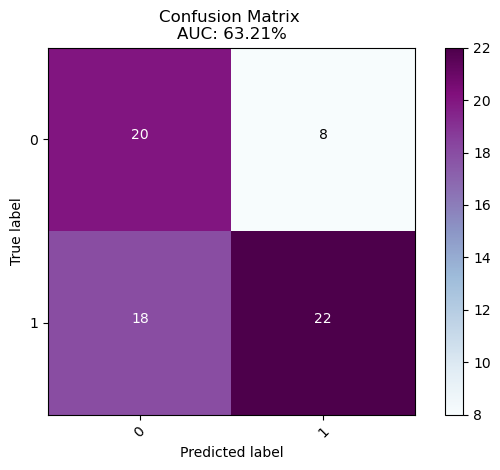

In [35]:
# Instantiate a cross-validation object with k=5
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate a linear regression model
model = DecisionTreeClassifier(max_depth=5)

# Use cross_val_score to perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Print the mean and standard deviation of the scores
print('Training Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

plot_metrics(y_test, y_pred, classes = ('0','1'), model_name='model')

Training Mean accuracy: 0.7222222222222222
Standard deviation: 0.06879324304076558

 Model AUC 65.00%, Accuracy 63.24% on Test Data

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        28
           1       0.76      0.55      0.64        40

    accuracy                           0.63        68
   macro avg       0.65      0.65      0.63        68
weighted avg       0.67      0.63      0.63        68



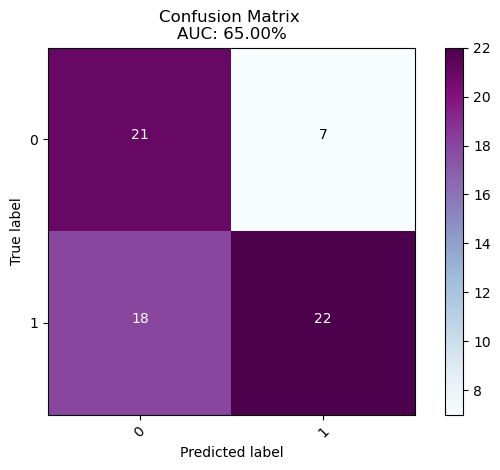

In [36]:
# Instantiate a linear regression model
model = DecisionTreeClassifier(max_depth=10)

# Use cross_val_score to perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Print the mean and standard deviation of the scores
print('Training Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

plot_metrics(y_test, y_pred, classes = ['0','1'], model_name='model')

Training Mean accuracy: 0.7148148148148149
Standard deviation: 0.06425685767739805

 Model AUC 61.79%, Accuracy 63.24% on Test Data

              precision    recall  f1-score   support

           0       0.56      0.54      0.55        28
           1       0.68      0.70      0.69        40

    accuracy                           0.63        68
   macro avg       0.62      0.62      0.62        68
weighted avg       0.63      0.63      0.63        68



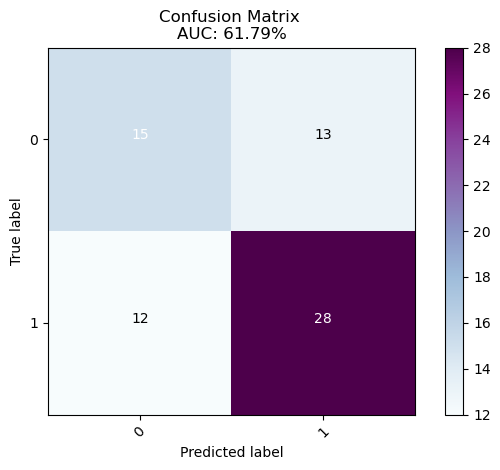

In [37]:
#Train another learning algorithm
from sklearn.neighbors import KNeighborsClassifier
# Instantiate a linear regression model
model = KNeighborsClassifier(n_neighbors=1)

# Use cross_val_score to perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Print the mean and standard deviation of the scores
print('Training Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

plot_metrics(y_test, y_pred, classes = ['0','1'], model_name='model')

Training Mean accuracy: 0.6925925925925925
Standard deviation: 0.09079741238615749

 Model AUC 62.14%, Accuracy 61.76% on Test Data

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        28
           1       0.71      0.60      0.65        40

    accuracy                           0.62        68
   macro avg       0.62      0.62      0.61        68
weighted avg       0.63      0.62      0.62        68



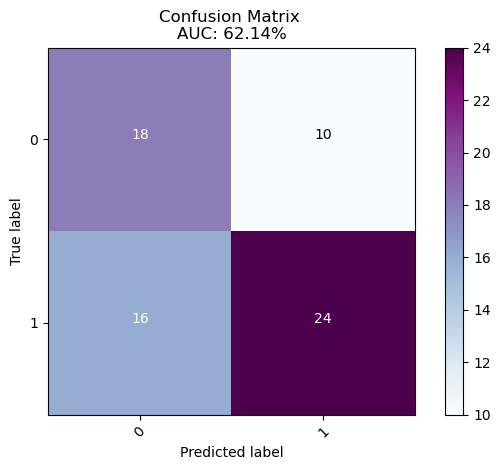

In [38]:
# Instantiate a linear regression model
model = KNeighborsClassifier(n_neighbors=10)

# Use cross_val_score to perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Print the mean and standard deviation of the scores
print('Training Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

plot_metrics(y_test, y_pred, classes = ['0','1'], model_name='model')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training Mean accuracy: 0.6730072463768115
Standard deviation: 0.10171500524276342

 Model AUC 68.68%, Accuracy 69.61% on Test Data

              precision    recall  f1-score   support

           0       0.64      0.63      0.64        43
           1       0.73      0.75      0.74        59

    accuracy                           0.70       102
   macro avg       0.69      0.69      0.69       102
weighted avg       0.70      0.70      0.70       102



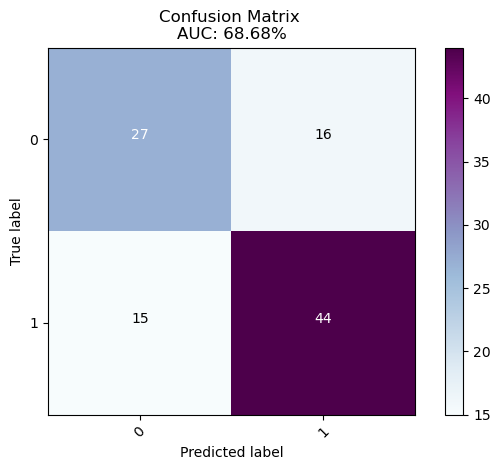

In [40]:
# Instantiate a cross-validation object with k=5
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate a linear regression model
model = DecisionTreeClassifier(max_depth=5)

# Use cross_val_score to perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Print the mean and standard deviation of the scores
print('Training Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

plot_metrics(y_test, y_pred, classes = ('0','1'), model_name='model')

Training Mean accuracy: 0.6744565217391305
Standard deviation: 0.1053533539335372

 Model AUC 63.18%, Accuracy 64.71% on Test Data

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        43
           1       0.68      0.73      0.70        59

    accuracy                           0.65       102
   macro avg       0.64      0.63      0.63       102
weighted avg       0.64      0.65      0.64       102



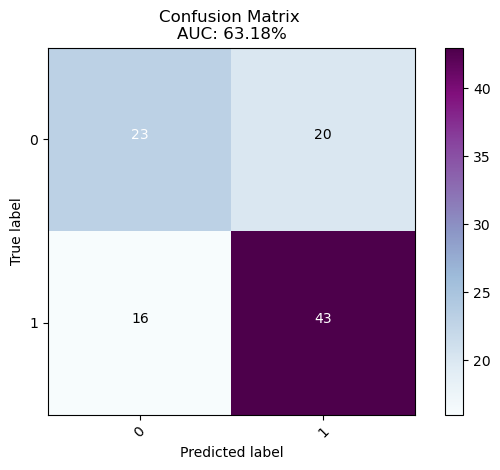

In [42]:
#Train another learning algorithm
from sklearn.neighbors import KNeighborsClassifier
# Instantiate a linear regression model
model = KNeighborsClassifier(n_neighbors=1)

# Use cross_val_score to perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Print the mean and standard deviation of the scores
print('Training Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

plot_metrics(y_test, y_pred, classes = ['0','1'], model_name='model')